<a href="https://colab.research.google.com/github/AzarEhCerto/Challenge-ONE-Data-Science-Alura-Store/blob/main/DesafioAlura2_Lojas_AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

üß† 1. Importa√ß√£o e Prepara√ß√£o de Dados

In [51]:
# üìö Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# üîó URLs dos dados
urls = {
    'Loja 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    'Loja 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    'Loja 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    'Loja 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

# üì• Carregando os dados
dados_lojas = {nome: pd.read_csv(url) for nome, url in urls.items()}

# Adiciona uma coluna com o nome da loja
for nome, df in dados_lojas.items():
    df["Loja"] = nome

# üîÑ Unindo todos os dados em um √∫nico DataFrame
dados = pd.concat(dados_lojas.values(), ignore_index=True)

# Convertendo coluna de data
dados['Data da Compra'] = pd.to_datetime(dados['Data da Compra'], dayfirst=True)

# Criando coluna "Ano-M√™s"
dados['Ano_Mes'] = dados['Data da Compra'].dt.to_period('M')



üìä 2. M√©tricas por Loja

In [55]:
# Faturamento total por loja
faturamento = dados.groupby("Loja")["Pre√ßo"].sum().sort_values(ascending=False)

# Avalia√ß√£o m√©dia por loja
avaliacoes = dados.groupby("Loja")["Avalia√ß√£o da compra"].mean().sort_values(ascending=False)

# Frete m√©dio por loja
frete_medio = dados.groupby("Loja")["Frete"].mean().sort_values()

# Produto mais vendido por loja (mais vezes comprado, independente de quantidade)
mais_vendidos = dados.groupby(["Loja", "Produto"]).size().reset_index(name="Total Compras")
top_produtos = mais_vendidos.sort_values(['Loja', 'Total Compras'], ascending=[True, False]).groupby("Loja").first()

# Categoria mais vendida por loja
categorias = dados.groupby(["Loja", "Categoria do Produto"]).size().reset_index(name="Total")
categoria_top = categorias.sort_values(['Loja', 'Total'], ascending=[True, False]).groupby("Loja").first()

### Produtos menos vendidos por loja
# Contagem de compras por produto e loja
produtos_vendas = dados.groupby(["Loja", "Produto"]).size().reset_index(name="Total Compras")

# Seleciona o produto menos vendido de cada loja
produtos_menos_vendidos = produtos_vendas.sort_values(['Loja', 'Total Compras'], ascending=[True, True])
produtos_menos_vendidos = produtos_menos_vendidos.groupby("Loja").first()

### Categorias menos vendidas por loja
# Contagem de compras por categoria e loja
categorias_vendas = dados.groupby(["Loja", "Categoria do Produto"]).size().reset_index(name="Total")
categorias_menos_vendidas = categorias_vendas.sort_values(['Loja', 'Total'], ascending=[True, True])
categorias_menos_vendidas = categorias_menos_vendidas.groupby("Loja").first()


üìà 3. Visualiza√ß√µes Gerais

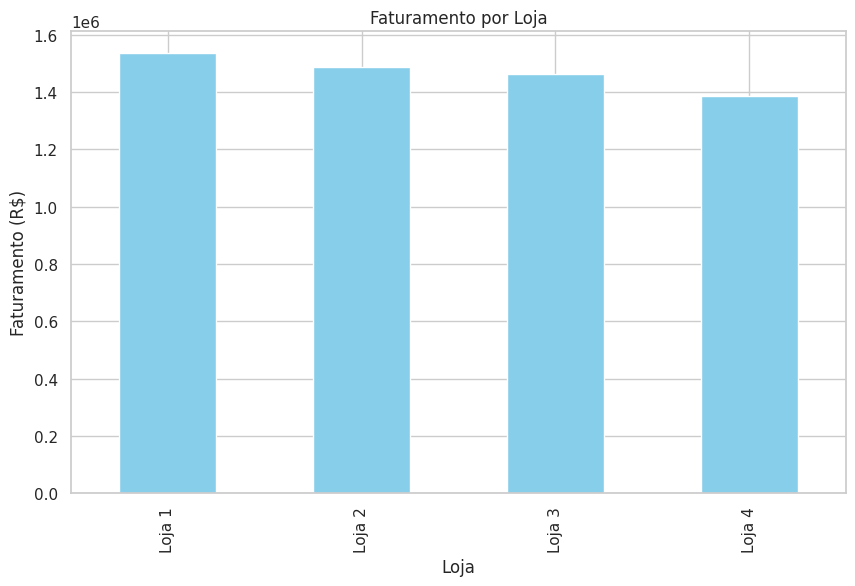

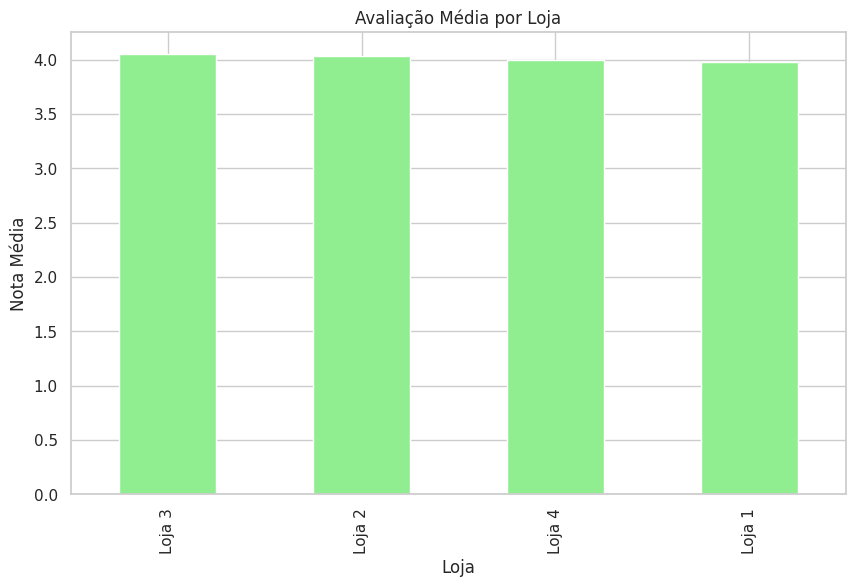

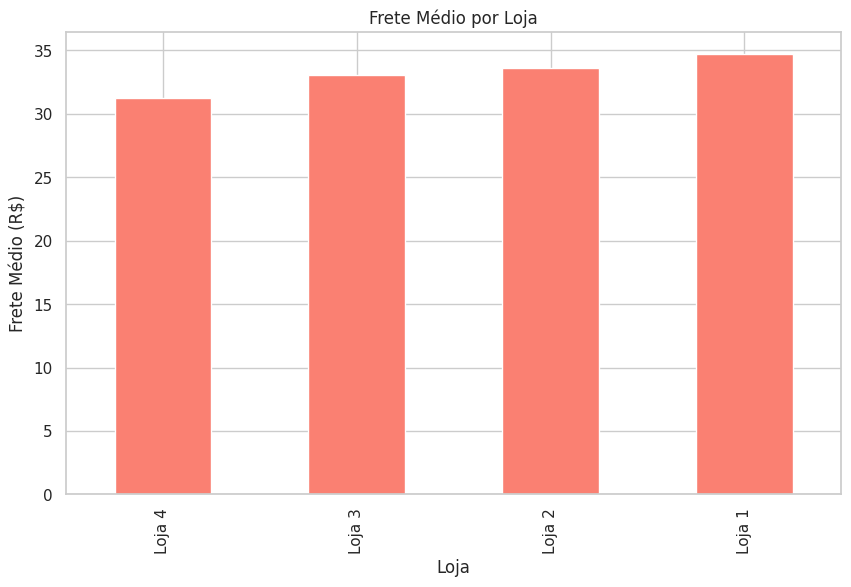

In [53]:
# Faturamento
faturamento.plot(kind="bar", title="Faturamento por Loja", color="skyblue")
plt.ylabel("Faturamento (R$)")
plt.show()

# Avalia√ß√£o
avaliacoes.plot(kind="bar", title="Avalia√ß√£o M√©dia por Loja", color="lightgreen")
plt.ylabel("Nota M√©dia")
plt.show()

# Frete
frete_medio.plot(kind="bar", title="Frete M√©dio por Loja", color="salmon")
plt.ylabel("Frete M√©dio (R$)")
plt.show()


üìå 4. Tipo de Pagamento por Loja (Gr√°ficos de Barras Horizontais)

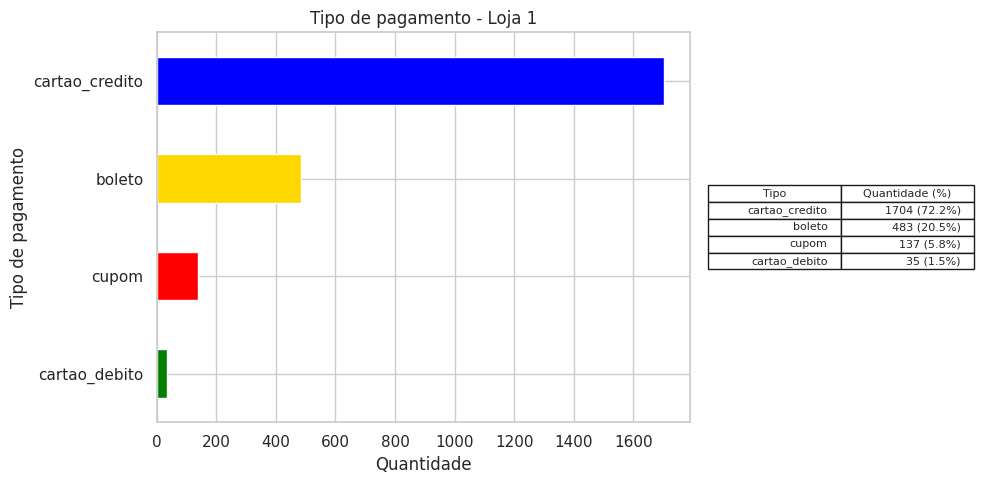

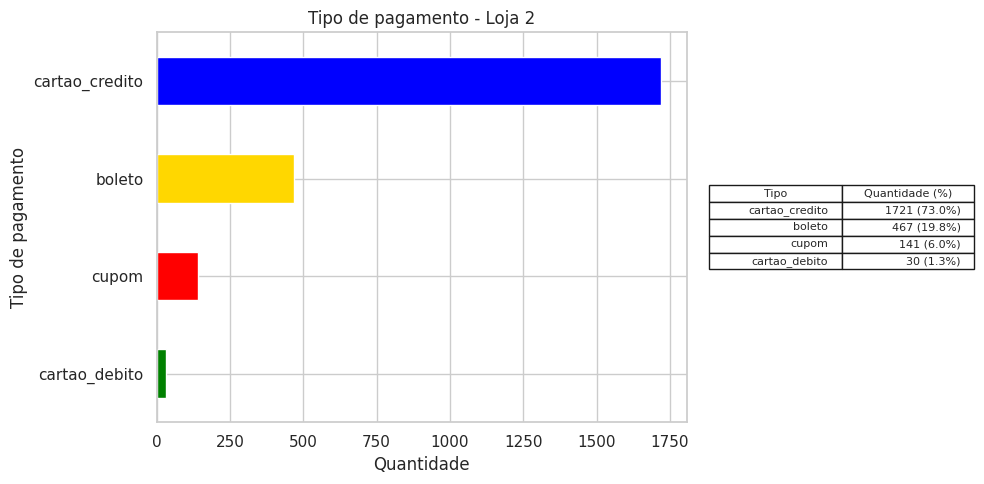

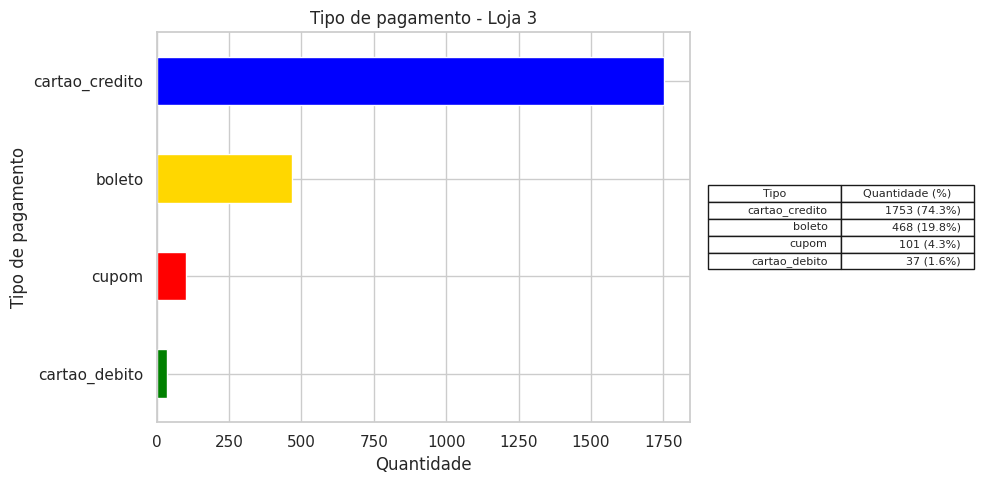

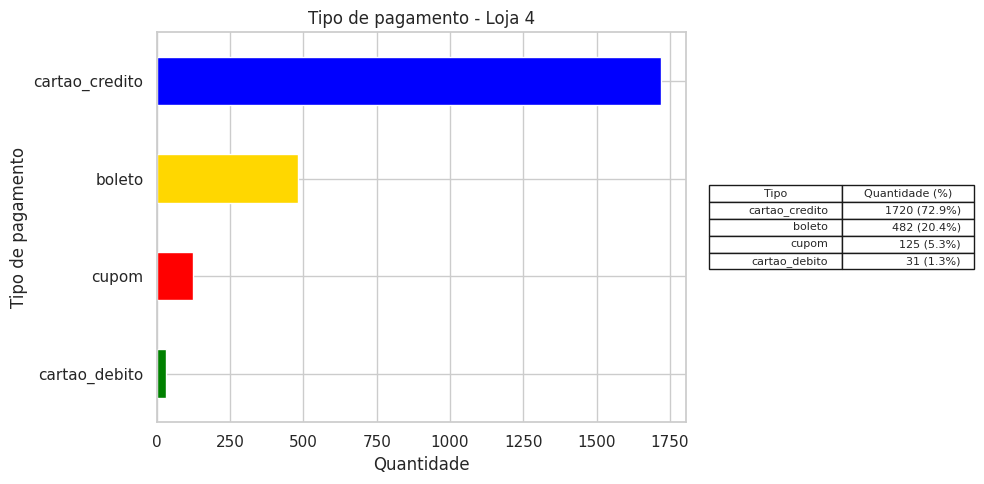

In [31]:
import matplotlib.pyplot as plt

# Dicion√°rio com cores fixas por tipo de pagamento
cores_pagamento = {
    "cartao_credito": "blue",
    "boleto": "gold",
    "cupom": "red",
    "cartao_debito": "green"
}

for loja in urls.keys():
    pagamentos = dados[dados["Loja"] == loja]["Tipo de pagamento"].value_counts()

    # Garante que todos os tipos est√£o na mesma ordem e recebam suas cores
    cores = [cores_pagamento.get(tipo, "gray") for tipo in pagamentos.index]

    fig, (ax_barra, ax_tabela) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [2, 1]})

    # Gr√°fico de barras horizontais com cores espec√≠ficas
    pagamentos.plot(kind='barh', ax=ax_barra, color=cores)
    ax_barra.set_title(f"Tipo de pagamento - {loja}")
    ax_barra.set_xlabel("Quantidade")
    ax_barra.invert_yaxis()

    # Tabela ao lado
    ax_tabela.axis('off')
    porcentagens = pagamentos / pagamentos.sum() * 100
    tabela_dados = [[tipo, f"{valor} ({porcent:.1f}%)"]
                    for tipo, valor, porcent in zip(pagamentos.index, pagamentos.values, porcentagens)]
    ax_tabela.table(cellText=tabela_dados, colLabels=["Tipo", "Quantidade (%)"], loc='center')

    plt.tight_layout()
    plt.show()

üåê 5. Dispers√£o Pre√ßo x Frete

      üìå 5.1. Verificar se h√° diferen√ßa real no frete entre as lojas

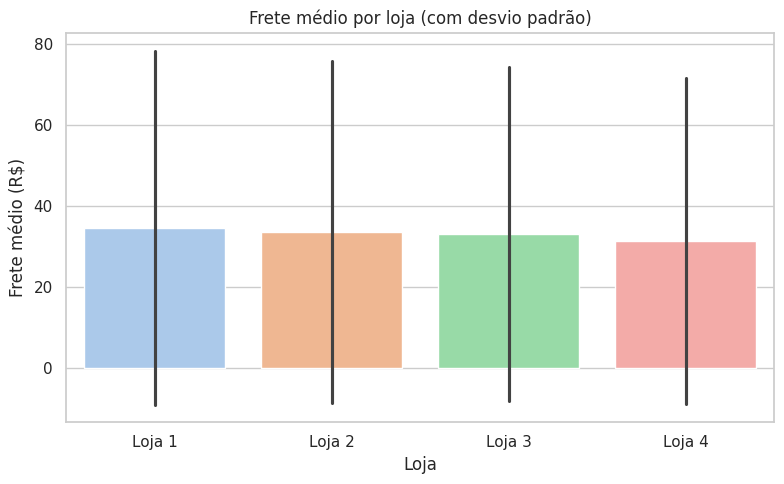

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=dados, x='Loja', y='Frete', estimator='mean', errorbar='sd', hue='Loja', legend=False, palette='pastel')
plt.title('Frete m√©dio por loja (com desvio padr√£o)')
plt.ylabel('Frete m√©dio (R$)')
plt.xlabel('Loja')
plt.tight_layout()
plt.show()


üìÖ 6. Faturamento Mensal

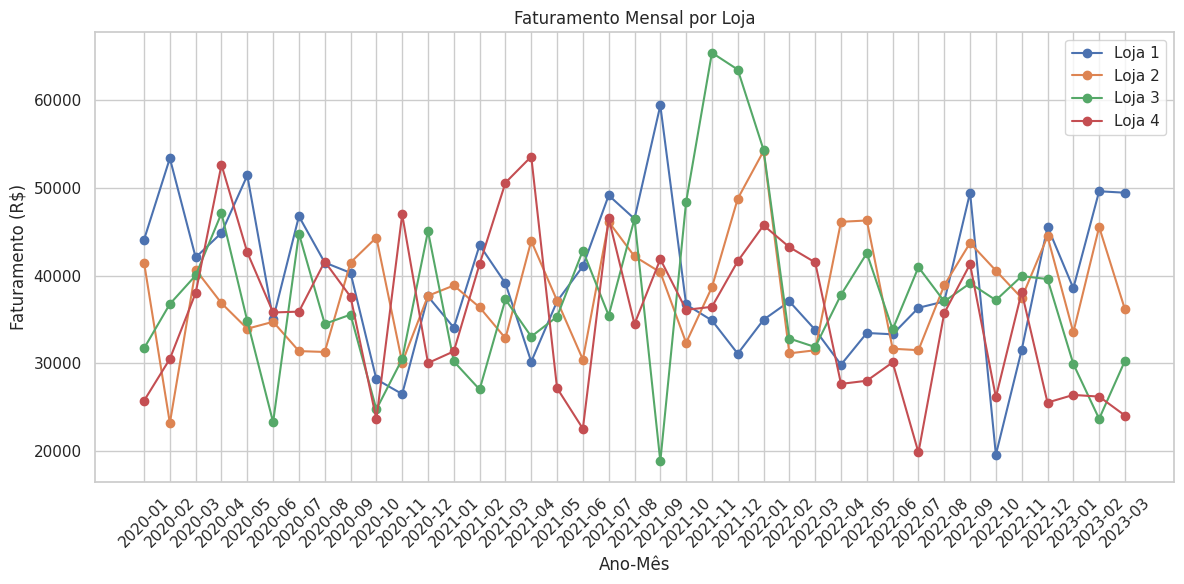

In [46]:
faturamento_mensal = dados.groupby(['Ano_Mes', 'Loja'])['Pre√ßo'].sum().reset_index()

plt.figure(figsize=(12, 6))
for loja in urls.keys():
    linha = faturamento_mensal[faturamento_mensal['Loja'] == loja]
    plt.plot(linha['Ano_Mes'].astype(str), linha['Pre√ßo'], marker='o', label=loja)

plt.title("Faturamento Mensal por Loja")
plt.xlabel("Ano-M√™s")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


üìã 7. Tabelas Resumo

In [63]:
print("üìå Produto mais vendido por loja:")
print(top_produtos)

print("\n")
print("\nüìå Categoria mais vendida por loja:")
print(categoria_top)

print("\n")
print("\nüìâ Produto menos vendido por loja:")
print(produtos_menos_vendidos)

print("\n")
print("\nüìâ Categoria menos vendida por loja:")
print(categorias_menos_vendidas)

print("\n")
print("\nüìå Avalia√ß√£o m√©dia por loja:")
print(avaliacoes.round(2))

üìå Produto mais vendido por loja:
                         Produto  Total Compras
Loja                                           
Loja 1             Guarda roupas             60
Loja 2  Iniciando em programa√ß√£o             65
Loja 3             Kit banquetas             57
Loja 4                  Cama box             62



üìå Categoria mais vendida por loja:
       Categoria do Produto  Total
Loja                              
Loja 1               moveis    465
Loja 2               moveis    442
Loja 3               moveis    499
Loja 4               moveis    480



üìâ Produto menos vendido por loja:
                  Produto  Total Compras
Loja                                    
Loja 1       Celular ABXY             33
Loja 2  Jogo de tabuleiro             32
Loja 3   Blocos de montar             35
Loja 4           Guitarra             33



üìâ Categoria menos vendida por loja:
         Categoria do Produto  Total
Loja                                
Loja 1  utilidades do

‚úÖ 8. Recomenda√ß√£o Final com Base nos Dados

In [50]:
# Pontua√ß√£o negativa por desempenho
pontos = {loja: 0 for loja in urls.keys()}
pontos[faturamento.idxmin()] += 1
pontos[avaliacoes.idxmin()] += 1
pontos[frete_medio.idxmax()] += 1

# Loja com pior desempenho
loja_menos_eficiente = max(pontos, key=pontos.get)

# Texto final
print(f"""
üîé Recomenda√ß√£o Final:

Com base nas an√°lises, a **{loja_menos_eficiente}** apresentou os piores indicadores:

- Faturamento Total: R$ {faturamento[loja_menos_eficiente]:,.2f}
- Nota M√©dia: {avaliacoes[loja_menos_eficiente]:.2f}
- Frete M√©dio: R$ {frete_medio[loja_menos_eficiente]:.2f}

Portanto, recomendamos que o Senhor Jo√£o considere **vender a {loja_menos_eficiente}** para iniciar seu novo empreendimento.
""")



üîé Recomenda√ß√£o Final:

Com base nas an√°lises, a **Loja 1** apresentou os piores indicadores:

- Faturamento Total: R$ 1,534,509.12
- Nota M√©dia: 3.98
- Frete M√©dio: R$ 34.69

Portanto, recomendamos que o Senhor Jo√£o considere **vender a Loja 1** para iniciar seu novo empreendimento.



üìå Resumo do Algoritmo de Recomenda√ß√£o:

No c√≥digo apresentado, a loja considerada menos eficiente √© a que:

Tem o menor faturamento ‚Üí 1 ponto negativo

Tem a menor m√©dia de avalia√ß√£o ‚Üí 1 ponto negativo

Tem o maior frete m√©dio ‚Üí 1 ponto negativo

A loja com **mais pontos negativos √© recomendada para ser vendida.**

üß† Poss√≠vel Causa:
A Loja 1 foi recomendada para ser fechada, ent√£o provavelmente ela ficou em √∫ltimo lugar nas outras duas m√©tricas:

Maior frete m√©dio ‚úÖ

Pior avalia√ß√£o m√©dia ‚úÖ

Mas com maior faturamento ‚ùå

Neste caso, ela somou 2 pontos negativos, enquanto as outras lojas ficaram com menos.

‚úÖ O algoritmo **n√£o considera s√≥ o faturamento!**
Faturamento alto √© importante, mas se vier acompanhado de:

*Frete caro (espanta cliente)*

*Avalia√ß√£o baixa (insatisfa√ß√£o)*

*Produtos de alto pre√ßo e baixa rotatividade*

Ent√£o a loja pode estar gerando preju√≠zo ou insatisfa√ß√£o a longo prazo ‚Äî por isso a recomenda√ß√£o √© vend√™-la e investir em uma loja mais equilibrada.

üß™ Gostaria de Confirmar essa informa√ß√£o?

Execute os seguintes comandos para verificar os dados reais:

In [54]:
print("Faturamento:\n", faturamento)
print("\nAvalia√ß√£o m√©dia:\n", avaliacoes)
print("\nFrete m√©dio:\n", frete_medio)
print("\nPontua√ß√£o final:\n", pontos)


Faturamento:
 Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Pre√ßo, dtype: float64

Avalia√ß√£o m√©dia:
 Loja
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685
Name: Avalia√ß√£o da compra, dtype: float64

Frete m√©dio:
 Loja
Loja 4    31.278997
Loja 3    33.074464
Loja 2    33.621941
Loja 1    34.691805
Name: Frete, dtype: float64

Pontua√ß√£o final:
 {'Loja 1': 2, 'Loja 2': 0, 'Loja 3': 0, 'Loja 4': 1}
